In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
file_path_no = '/content/csv_AKI_NO v7.csv'
file_path_yes = '/content/csv_AKI_YES v7.csv'

aki_no = pd.read_csv(file_path_no)
aki_yes = pd.read_csv(file_path_yes)

aki_no

,ID,ABX,ABXD,ABXDAYS,DKI,NEPH,IDATE,AGE,GENDER,ICODE,...,MRZ,Nephrotoxic ABX 1=yes 0=no ND = no data,Number of Days on Nephrotoxic ABX (ND= no data) (NA = not applicable),Direct Kidney Injury 0=nil 1=injury,Nephrectomy 0=nil 1=yes,Pre-existing CKD in HX,RISK FACTORS AKI (co-morbidity),RISK FACTORS AKI (co-morbidity).1,Nephrotoxic DRUGS 1=yes 0=no,Charlson Co-morbidity Index
0,1,NaN,NaN,NaN,0,0,23/01/2008,19,1,7,...,0,ND,ND,0.0,0,0,0,0,0,0
1,2,NaN,NaN,NaN,0,0,23/01/2008,76,0,8,...,0,ND,ND,0.0,0,0,0,1,0,3
2,3,NaN,NaN,NaN,0,0,28/01/2008,34,1,10,...,0,ND,ND,0.0,0,0,0,0,0,0
3,4,NaN,NaN,NaN,0,0,29/01/2008,47,0,20,...,0,ND,ND,0.0,0,0,0,0,0,0
4,5,NaN,NaN,NaN,0,0,29/01/2008,41,1,1,...,0,ND,ND,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,1391,0.0,NaN,0.0,0,0,04/10/2015,35,0,14,...,0,0,NaN,0.0,0,0,NaN,0,0,0
1228,1479,0.0,NaN,0.0,0,0,06/05/2016,26,1,7,...,0,0,NaN,0.0,0,0,NaN,0,0,0
1229,1516,0.0,NaN,0.0,0,0,07/08/2016,16,1,11,...,0,0,NaN,0.0,0,0,NaN,0,0,0
1230,1520,0.0,NaN,0.0,0,0,11/08/2016,40,1,2,...,0,0,NaN,0.0,0,0,NaN,0,0,0


In [3]:
# Merging the datasets
df_combined = pd.concat([aki_no, aki_yes], axis=0, ignore_index=True)
df_combined

,ID,ABX,ABXD,ABXDAYS,DKI,NEPH,IDATE,AGE,GENDER,ICODE,...,AKICRE15DAY,AKIUOMIN.1,AKIUOMINDAY,AKIFINAL.1,Number of Criteria met,First day after injury that AKI criteria met,Only UOMIN,Known pre-existing CKDin Hx yes = 1,Nephrotoxic Drugs total 1=yes 0=no,Charlsons Co-morbidity Index
0,1,NaN,NaN,NaN,0,0,23/01/2008,19,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,0,0,23/01/2008,76,0,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,0,0,28/01/2008,34,1,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,0,0,29/01/2008,47,0,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,0,0,29/01/2008,41,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,1563,1.0,7.0,7.0,0,0,31/10/2016,34,0,8,...,13.0,0.0,NaN,1.0,2.0,1,0.0,0.0,1.0,0.0
1406,1566,0.0,NaN,0.0,0,0,03/11/2016,38,1,2,...,NaN,NaN,NaN,1.0,1.0,RRT,0.0,0.0,0.0,0.0
1407,1567,0.0,NaN,0.0,0,0,05/11/2016,75,1,16,...,NaN,0.0,NaN,1.0,1.0,2,0.0,0.0,0.0,3.0
1408,1578,0.0,NaN,0.0,0,0,03/12/2016,32,0,4,...,NaN,0.0,NaN,1.0,1.0,5,0.0,0.0,0.0,0.0


In [4]:
# Selecting relevant columns from the dataframe
input_vars = ['HNAIS', 'FAIS', 'TAIS', 'APAIS', 'EMAIS', 'ELAIS'] #'PREPRBC',
output_var = 'IHR12PRBC'

columns_to_keep = input_vars + [output_var]
df_relevant = df_combined[columns_to_keep]

# Check for missing values
missing_values = df_relevant.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values in the dataset:")
print(missing_values)

# Drop rows with any missing values
df_relevant_clean = df_relevant.dropna()

print(f"\nNumber of rows before dropping: {df_relevant.shape[0]}")
print(f"Number of rows after dropping: {df_relevant_clean.shape[0]}")

Missing values in the dataset:
HNAIS        3
FAIS         7
TAIS         5
APAIS        6
EMAIS        4
ELAIS        7
IHR12PRBC    2
dtype: int64

Number of rows before dropping: 1410
Number of rows after dropping: 1394


In [5]:
# Convert IHR12PRBC into categories
def categorise_ihr12prbc(value):
    if value <= 2:
        return 0
    elif value <= 10:
        return 1
    else:
        return 2

# applying categorise function
df_relevant_clean = df_relevant_clean.copy()  # had to make a copy here to avoid SettingWithCopyWarning
df_relevant_clean.loc[:, 'IHR12PRBC_category'] = df_relevant_clean['IHR12PRBC'].apply(categorise_ihr12prbc)

# Function to convert AIS scores to categorical
def convert_ais_to_categorical(ais): #for initial data exploration - use original categories for AIS distribution e.g. no injury, mild, severe
    if 0 == ais:
        return 0 # no injury
    elif 1 <= ais <= 3:
        return 1 # Mild to moderate injury
    else:
      return 2 # Severe injury

# Apply conversion to each AIS column using .loc to avoid the warning
for col in input_vars:
    df_relevant_clean.loc[:, col] = pd.to_numeric(df_relevant_clean[col], errors='coerce')
    df_relevant_clean.loc[:, col] = df_relevant_clean[col].apply(convert_ais_to_categorical)

In [6]:
# Definition of input features and target variable
X = df_relevant_clean[input_vars]
y = df_relevant_clean['IHR12PRBC_category']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Random Forest Classifier Accuracy: 0.7347670250896058
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       205
           1       0.43      0.25      0.32        60
           2       0.25      0.21      0.23        14

    accuracy                           0.73       279
   macro avg       0.49      0.46      0.47       279
weighted avg       0.70      0.73      0.71       279



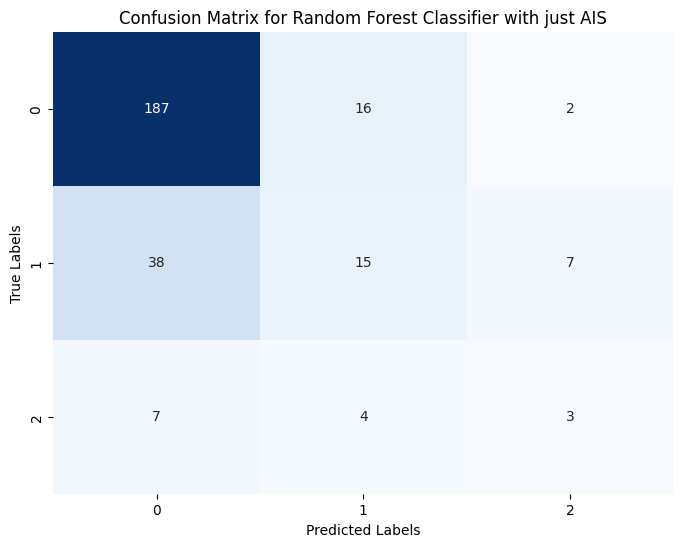

In [7]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Classifier Accuracy: {accuracy_rf}")
print("Classification Report:\n", class_report_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Random Forest Classifier with just AIS')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()